<a href="https://colab.research.google.com/github/rajy4683/S15Test/blob/master/S15Unet6_Large_56_PSL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue May 19 16:42:28 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import sys

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
sys.path.append('/content/drive/My Drive/EVA4/RekogNizer')
sys.path.append('/content/drive/My Drive/EVA4')
sys.path.append('/content/drive/My Drive/EVA4/DenseDepth')

### Dependencies


In [4]:
!pip install -r /content/drive/My\ Drive/EVA4/RekogNizer/requirements.txt

     |████████████████████████████████| 112kB 2.7MB/s 
     |████████████████████████████████| 1.4MB 9.0MB/s 
     |████████████████████████████████| 163kB 16.2MB/s 
     |████████████████████████████████| 460kB 14.5MB/s 
     |████████████████████████████████| 102kB 9.4MB/s 
     |████████████████████████████████| 112kB 20.1MB/s 
     |████████████████████████████████| 102kB 8.4MB/s 
     |████████████████████████████████| 634kB 13.5MB/s 
     |████████████████████████████████| 71kB 7.9MB/s 
     |████████████████████████████████| 71kB 7.9MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp36-none-any.whl size=6489 sha256=b7411fbfe4f251ca7a1797f7741acf1e6403ccdf71035e9fa0896a264757caf6
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
  Created wheel for gql: filename=gql-0.2.0-cp36-none-any.whl size=7630 sha256=bd73ceb8db1ff5e6f978093141eb2f58f2f079a8564d34505cd01d3c99e6b425
  Stored in directory: /root/.cache

In [5]:
!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-fp5pqtt8
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-fp5pqtt8
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65055 sha256=50d1378cea23576700d201b9db3901681fc90fd9c24e2e031009db8bc47716b5
  Stored in directory: /tmp/pip-ephem-wheel-cache-612firyv/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [6]:
!wandb login a6f947d2d2f69e7a8c8ca0f69811fd554f27d204


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
Successfully logged in to Weights & Biases!


In [0]:
import os

import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.color import label2rgb

import albumentations as A
import random
from google.colab.patches import cv2_imshow
from PIL import Image
import glob
import pandas as pd

import torch
from zipfile import ZipFile
import re
import h5py
import time



In [23]:
%load_ext autoreload
%autoreload 2
import torch
import torchvision
import torchvision.transforms as transforms
from RekogNizer import hyperparams


from albumentations import Compose, RandomCrop, Normalize, HorizontalFlip, Resize, Cutout, MotionBlur
from albumentations import (
    HorizontalFlip, Compose, RandomCrop, Cutout,Normalize, HorizontalFlip, RandomBrightnessContrast,
    Resize,RandomSizedCrop, MotionBlur,MultiplicativeNoise,InvertImg, IAAFliplr,
	IAAPerspective,
)
from albumentations.pytorch import ToTensor
import random

from torchvision.datasets.vision import VisionDataset
from torchvision.datasets.utils import check_integrity, download_and_extract_archive
import os
import sys
import numpy as np
from torchvision import datasets
#from RekogNizer import imgnetloader
from RekogNizer import basemodelclass
from RekogNizer import mmdlrfinder

from RekogNizer import mmdtraintest
from RekogNizer import mmddataloader
from RekogNizer import mmdlosses
from RekogNizer import mmdmodels
from RekogNizer import mmdbetamodels

from RekogNizer import hyperparams
from RekogNizer import fileutils

from torch.utils.data import Dataset
import shutil
from tqdm import tqdm
from RekogNizer import mmdmodels

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR, OneCycleLR, MultiStepLR, CyclicLR, ReduceLROnPlateau


import kornia

import cv2
import numpy as np
import matplotlib.pyplot as plt
from torchsummary import summary
import wandb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Mask Image (Mean and Variance
Mask Mean:0.057950844077600344, Mask StdDev:0.0016620444341229432
### Depth mean and Variance
Depth Mean:0.3679109312239146, Depth StdDev:0.03551773442719045

In [0]:
!rm -rf /content/train && mkdir -p /content/train
!rm -rf /content/test && mkdir -p /content/test

In [10]:
csv_file ='/content/drive/My Drive/EVA4/tsai/S15EVA4/FinalDataSet/DepthMapDataSetTrain.csv'
root_dir = '/content/drive/My Drive/EVA4/tsai/S15EVA4/'
batch_start = 150000
batch_end = batch_start+30000
dest_dir="/content/train"

mmddataloader.extract_data_files_mt(csv_file, root_dir, batch_start,batch_end, dest_dir=dest_dir)


Extracting image and mask files Total:9
Zip Name:image_mask_gt1k2k.zip Total Files:9988
Zip Name:depth_mask_gt_1k2k.zip Total Files:4994
Zip Name:image_mask_gt6k8k.zip Total Files:9676
Zip Name:image_mask_gt2k6k.zip Total Files:20100
Zip Name:image_mask_gt8k12k.zip Total Files:20238
Zip Name:depth_mask_gt_2k6k.zip Total Files:10050
Zip Name:depth_mask_gt_6k8k.zip Total Files:4838
Zip Name:depth_mask_gt_8k12k.zip Total Files:10119
Extracting bg files
Total file count:90113 


In [0]:
size_hw = (56,56)
dest_dir="/content/train"
train_batch_size = 256
depth_dataset = mmddataloader.DepthMaskDataSet(csv_file, dest_dir, batch_start,batch_end, read_zip=False,
                                 transform_base=mmddataloader.resize_bg(size_hw[0],size_hw[1],[0.56632738, 0.51567622, 0.45670792], [0.1076622, 0.10650349, 0.12808967] ),
                                 transform_bg=mmddataloader.resize_bg(size_hw[0],size_hw[1],[0.57469445, 0.52241555, 0.45992244], [0.11322354, 0.11195428, 0.13441683]),
                                 transform_mask = mmddataloader.resize_bg_nonNorm(size_hw[0],size_hw[1]),
                                 transform_depth = mmddataloader.resize_bg_nonNorm(size_hw[0],size_hw[1]),
                                 #transform_mask=mmddataloader.resize_bg(size_hw[0],size_hw[1], [0.0579508], [0.001662]),
                                 #transform_depth=mmddataloader.resize_bg(size_hw[0],size_hw[1], [0.3679109], [0.03551773]),
                                 )
from torch.utils.data import DataLoader
kwargs= { 'num_workers':8,'pin_memory': True}
train_loader = DataLoader(depth_dataset, batch_size=train_batch_size, shuffle=False, **kwargs)

In [12]:
test_csv_file ='/content/drive/My Drive/EVA4/tsai/S15EVA4/FinalDataSet/DepthMapDataSetTest.csv'
root_dir = '/content/drive/My Drive/EVA4/tsai/S15EVA4/'
test_batch_start = 0
test_batch_end = test_batch_start + 512
test_batch_size=16
test_dest_dir = "/content/test"

mmddataloader.extract_data_files(test_csv_file, root_dir, test_batch_start,test_batch_end, dest_dir=test_dest_dir)

Extracting image and mask files


image_mask_gt1k2k.zip: 100%|██████████| 1026/1026 [00:47<00:00, 21.63it/s]


Extracting depth files


depth_mask_gt_1k2k.zip: 100%|██████████| 513/513 [00:25<00:00, 20.36it/s]


Extracting bg files
Total file count:1556 


In [0]:
iter(train_loader).next()['input'].shape

torch.Size([256, 6, 56, 56])

In [0]:
size_hw = (56,56)
test_dest_dir = "/content/test"
test_dataset = mmddataloader.DepthMaskDataSet(test_csv_file, test_dest_dir, test_batch_start,test_batch_end,read_zip=False,
                                 transform_base=mmddataloader.resize_bg(size_hw[0],size_hw[1],[0.56632738, 0.51567622, 0.45670792], [0.1076622, 0.10650349, 0.12808967] ),
                                 transform_bg=mmddataloader.resize_bg(size_hw[0],size_hw[1],[0.57469445, 0.52241555, 0.45992244], [0.11322354, 0.11195428, 0.13441683]),
                                 transform_mask = mmddataloader.resize_bg_nonNorm(size_hw[0],size_hw[1]),
                                 transform_depth = mmddataloader.resize_bg_nonNorm(size_hw[0],size_hw[1]),
                                 #transform_mask=mmddataloader.resize_bg(size_hw[0],size_hw[1], [0.0579508], [0.001662]),
                                 #transform_depth=mmddataloader.resize_bg(size_hw[0],size_hw[1], [0.3679109], [0.03551773]),
                                 )
from torch.utils.data import DataLoader
kwargs= { 'num_workers':4,'pin_memory': True}
test_loader = DataLoader(test_dataset, batch_size=test_batch_size, shuffle=False, **kwargs)

In [0]:
#csv_file = '/content/drive/My Drive/EVA4/tsai/S15EVA4/DepthMapDataSetSample.csv'
batch_start = 90000
batch_end = batch_start+30000

test_batch_start = 512
test_batch_end = test_batch_start + 1512
csv_file ='/content/drive/My Drive/EVA4/tsai/S15EVA4/FinalDataSet/DepthMapDataSetTrain.csv'
root_dir = '/content/drive/My Drive/EVA4/tsai/S15EVA4/'
size_hw = (128,128)
depth_dataset = mmddataloader.DepthMaskDataSet(csv_file, root_dir, batch_start,batch_end, read_zip=True,
                                 transform_base=mmddataloader.resize_bg(size_hw[0],size_hw[1],[0.56632738, 0.51567622, 0.45670792], [0.1076622, 0.10650349, 0.12808967] ),
                                 transform_bg=mmddataloader.resize_bg(size_hw[0],size_hw[1],[0.57469445, 0.52241555, 0.45992244], [0.11322354, 0.11195428, 0.13441683]),
                                  transform_mask = mmddataloader.resize_bg_nonNorm(size_hw[0],size_hw[1]),
                                  transform_depth = mmddataloader.resize_bg_nonNorm(size_hw[0],size_hw[1]),
                                 #transform_mask=mmddataloader.resize_bg(size_hw[0],size_hw[1], [0.0579508], [0.001662]),
                                 #transform_depth=mmddataloader.resize_bg(size_hw[0],size_hw[1], [0.3679109], [0.03551773]),
                                 )
from torch.utils.data import DataLoader
kwargs= { 'num_workers':1,'pin_memory': True}
train_loader = DataLoader(depth_dataset, batch_size=64, shuffle=False, **kwargs)

test_dataset = mmddataloader.DepthMaskDataSet(csv_file, root_dir, test_batch_start,test_batch_end,read_zip=True,
                                 transform_base=mmddataloader.resize_bg(size_hw[0],size_hw[1],[0.56632738, 0.51567622, 0.45670792], [0.1076622, 0.10650349, 0.12808967] ),
                                 transform_bg=mmddataloader.resize_bg(size_hw[0],size_hw[1],[0.57469445, 0.52241555, 0.45992244], [0.11322354, 0.11195428, 0.13441683]),
                                 transform_mask = mmddataloader.resize_bg_nonNorm(size_hw[0],size_hw[1]),
                                 transform_depth = mmddataloader.resize_bg_nonNorm(size_hw[0],size_hw[1]),
                                 #transform_mask=mmddataloader.resize_bg(size_hw[0],size_hw[1], [0.0579508], [0.001662]),
                                 #transform_depth=mmddataloader.resize_bg(size_hw[0],size_hw[1], [0.3679109], [0.03551773]),
                                 )
from torch.utils.data import DataLoader
kwargs= { 'num_workers':1,'pin_memory': True}
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, **kwargs)


Learning rate search finished. See the graph with {finder_name}.plot()
0.07762471166286918 1.0 1.448357105255127
{'lr': [0.0010715193052376064, 0.0011481536214968829, 0.0012302687708123817, 0.001318256738556407, 0.0014125375446227544, 0.0015135612484362083, 0.00162181009735893, 0.0017378008287493756, 0.0018620871366628676, 0.00199526231496888, 0.002137962089502232, 0.0022908676527677732, 0.0024547089156850307, 0.002630267991895382, 0.002818382931264454, 0.003019951720402016, 0.003235936569296283, 0.0034673685045253162, 0.0037153522909717258, 0.0039810717055349725, 0.004265795188015926, 0.00457088189614875, 0.004897788193684463, 0.0052480746024977255, 0.005623413251903491, 0.006025595860743578, 0.006456542290346557, 0.006918309709189366, 0.007413102413009174, 0.007943282347242814, 0.008511380382023764, 0.009120108393559099, 0.009772372209558108, 0.010471285480508997, 0.011220184543019632, 0.012022644346174128, 0.012882495516931339, 0.01380384264602885, 0.014791083881682076, 0.015848931

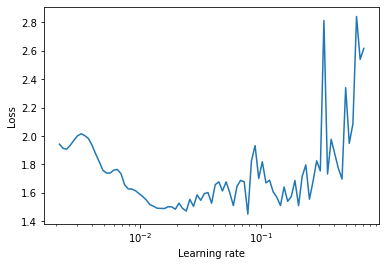

In [53]:
### LR finder ###
from RekogNizer import mmdtraintest
criterion={"mask":[mmdlosses.dice_loss, mmdlosses.LocalL1Loss], "depth":[mmdlosses.LocalL1Loss, mmdlosses.LocalSSIMLoss]}
model_new = mmdbetamodels.TestUNet(n_channels=6, n_classes=2)
#mmdmodels.UNet(n_channels=6, n_classes=2)
optimizer=optim.SGD(model_new.parameters(), lr=0.001,momentum=0.9,  weight_decay=0)
lrfinder = mmdtraintest.find_lr_type1(model_new, optimizer, criterion, 
                                      train_loader, testloader=None,
                                      seed=1, 
                                      start_lr=0.001, end_lr=1, 
                                      step_mode="exp",
                                      num_iter=100)
min_lr = lrfinder.history['lr'][np.argmin(lrfinder.history['loss'])]
max_lr = np.max(lrfinder.history['lr'])
print(min_lr, max_lr, np.min(lrfinder.history['loss']))
print(lrfinder.history)
lrfinder.plot()
lrfinder.reset()

In [0]:
summary(model_new, input_size=(6,64,64)  )

In [0]:
del model
torch.cuda.empty_cache()

In [0]:
lrfinder.reset()

In [0]:
device = torch.device("cuda" if not hyperparams.hyperparameter_defaults['no_cuda'] else "cpu")
model_new  =mmdbetamodels.UNet(n_channels=6, n_classes=2)

model_new = mmdtraintest.load_model_for_infer(model_new, 
                                  '/content/drive/My Drive/EVA4/model_saves/model-13f9c05faf.h5',
                                  device)


In [0]:
#model_new  =mmdmodels.CustomUNet
device = torch.device("cuda" if not hyperparams.hyperparameter_defaults['no_cuda'] else "cpu")
base_model = mmdbetamodels.TestUNet(n_channels=6, n_classes=2)
#model_new  =mmdmodels.CustomUNet(base_model,n_channels=6, n_classes=2)

summary(base_model.to(device),input_size=(6,224,224))
#summary(base_model.to(device),input_size=(6,64,64))

In [0]:
list(base_model.children())[:-1]

In [0]:
base_model.eval()

In [55]:
from RekogNizer import mmdlosses
from RekogNizer import mmdtraintest
device = torch.device("cuda" if not hyperparams.hyperparameter_defaults['no_cuda'] else "cpu")
#hyperparams.set_hyperparam({"epochs":3})
tqdm._instances.clear()
hyperparams.hyperparameter_defaults['epochs'] = 20
hyperparams.hyperparameter_defaults['run_name'] = fileutils.rand_run_name()
hyperparams.hyperparameter_defaults['lr'] = 0.07762471166286918 #0.03381790256192963 #0.008912509381337455 
print("Initializing datasets and dataloaders")    

#criterion={"mask":[mmdlosses.dice_loss, mmdlosses.LocalBCELoss], "depth":[mmdlosses.LocalRMSELoss]}
criterion={"mask":[mmdlosses.dice_loss, mmdlosses.LocalL1Loss], "depth":[mmdlosses.LocalL1Loss, mmdlosses.LocalSSIMLoss]}
model_new = mmdbetamodels.TestUNet(n_channels=6, n_classes=2)

wandb_run_init = wandb.init(config=hyperparams.hyperparameter_defaults, project=hyperparams.hyperparameter_defaults['project'])
#wandb.watch_called = False
config = wandb.config
print(config)
#wandb.watch(model_new, log="none")
#criterion={"mask":[mmdlosses.LocalBCELoss, mmdlosses.dice_loss], "depth":[mmdlosses.LocalRMSELoss, mmdlosses.LocalSSIMLoss]}
#trainloader, testloader = dataloader.get_train_test_dataloader_cifar10()
optimizer=optim.SGD(model_new.parameters(), lr=config.lr,momentum=config.momentum,
                        weight_decay=0)


#criterion=mmdlosses.bce_with_rmse

#print("Momentum cycling set to {}".format(cycle_momentum))
#scheduler = StepLR(optimizer, step_size=config.sched_lr_step, gamma=config.sched_lr_gamma)  
#scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True, threshold=0.0001)
scheduler = OneCycleLR(optimizer, 
                        config.ocp_max_lr, 
                        epochs=config.epochs, 
                        cycle_momentum=False, 
                        steps_per_epoch=len(train_loader), 
                        base_momentum=config.momentum,
                        max_momentum=0.95, 
                        pct_start=0.2,
                        anneal_strategy=config.anneal_strategy,
                        div_factor=config.div_factor,
                        final_div_factor=config.final_div_factor
                           )

final_model_path = mmdtraintest.execute_model(model_new, 
            hyperparams.hyperparameter_defaults, 
            train_loader, test_loader, 
            device, 
            wandb=wandb,
            optimizer_in=optimizer,
            scheduler=scheduler,
            prev_saved_model=None,
            criterion=criterion,
            save_best=True,
            lars_mode=False,
            batch_step=True)


Initializing datasets and dataloaders


  0%|          | 0/118 [00:00<?, ?it/s]

wandb_version: 1

_wandb:
  desc: null
  value:
    cli_version: 0.8.36
    framework: torch
    is_jupyter_run: true
    is_kaggle_kernel: false
    python_version: 3.6.9
anneal_strategy:
  desc: null
  value: linear
batch_size:
  desc: null
  value: 512
bias:
  desc: null
  value: false
cycle_momentum:
  desc: null
  value: false
div_factor:
  desc: null
  value: 128
dropout:
  desc: null
  value: 0.1
epochs:
  desc: null
  value: 20
factor:
  desc: null
  value: 0.0
final_div_factor:
  desc: null
  value: 64
lr:
  desc: null
  value: 0.07762471166286918
lr_decay_threshold:
  desc: null
  value: 0.0
lr_policy:
  desc: null
  value: ocp
momentum:
  desc: null
  value: 0.9
no_cuda:
  desc: null
  value: false
ocp_max_lr:
  desc: null
  value: 0.5
pct_start:
  desc: null
  value: 0.208
project:
  desc: null
  value: news5
run_name:
  desc: null
  value: 17b3b5711b
sched_lr_gamma:
  desc: null
  value: 0.5
sched_lr_step:
  desc: null
  value: 1
seed:
  desc: null
  value: 1
split_pct:
  

loss=1.339584 m_loss=0.958452 d_loss=0.381131 batch_id=117: 100%|██████████| 118/118 [02:16<00:00,  1.15s/it]
loss=1.393880844116211 batch_id=32: 100%|██████████| 33/33 [00:03<00:00,  9.95it/s]



Epoch: 1 Train set: Average loss: 0.006044, Mask loss:0.002115, Depth loss:0.003929, lr:0
Epoch: 1 Test set: Average loss: 0.088373, Mask loss:0.061935, Depth loss:0.026438
Model saved as Test loss reduced from  10000.0  to  0.0883726192961427


loss=1.185299 m_loss=0.958143 d_loss=0.227156 batch_id=117: 100%|██████████| 118/118 [02:15<00:00,  1.15s/it]
loss=1.1904730796813965 batch_id=32: 100%|██████████| 33/33 [00:03<00:00, 10.38it/s]



Epoch: 2 Train set: Average loss: 0.004960, Mask loss:0.001160, Depth loss:0.003800, lr:0
Epoch: 2 Test set: Average loss: 0.078221, Mask loss:0.063160, Depth loss:0.015061
Model saved as Test loss reduced from  0.0883726192961427  to  0.0782212946150038


loss=1.131882 m_loss=0.958983 d_loss=0.172898 batch_id=117: 100%|██████████| 118/118 [02:12<00:00,  1.12s/it]
loss=1.0954583883285522 batch_id=32: 100%|██████████| 33/33 [00:03<00:00, 10.67it/s]



Epoch: 3 Train set: Average loss: 0.004567, Mask loss:0.000758, Depth loss:0.003808, lr:0
Epoch: 3 Test set: Average loss: 0.072816, Mask loss:0.061632, Depth loss:0.011184
Model saved as Test loss reduced from  0.0782212946150038  to  0.07281598315136707


loss=1.104014 m_loss=0.959718 d_loss=0.144296 batch_id=117: 100%|██████████| 118/118 [02:14<00:00,  1.14s/it]
loss=1.0849412679672241 batch_id=32: 100%|██████████| 33/33 [00:03<00:00, 10.66it/s]



Epoch: 4 Train set: Average loss: 0.004438, Mask loss:0.000634, Depth loss:0.003804, lr:0
Epoch: 4 Test set: Average loss: 0.072062, Mask loss:0.061983, Depth loss:0.010079
Model saved as Test loss reduced from  0.07281598315136707  to  0.07206197486751029


loss=1.100082 m_loss=0.971405 d_loss=0.128677 batch_id=117: 100%|██████████| 118/118 [02:13<00:00,  1.13s/it]
  0%|          | 0/118 [00:00<?, ?it/s]


Epoch: 5 Train set: Average loss: 0.004385, Mask loss:0.000575, Depth loss:0.003810, lr:0
Epoch: 5 Test set: Average loss: 0.072867, Mask loss:0.063114, Depth loss:0.009754


loss=1.076933 m_loss=0.961868 d_loss=0.115065 batch_id=117: 100%|██████████| 118/118 [02:12<00:00,  1.12s/it]
loss=1.0781993865966797 batch_id=32: 100%|██████████| 33/33 [00:03<00:00, 10.70it/s]



Epoch: 6 Train set: Average loss: 0.004360, Mask loss:0.000541, Depth loss:0.003820, lr:0
Epoch: 6 Test set: Average loss: 0.071412, Mask loss:0.062285, Depth loss:0.009127
Model saved as Test loss reduced from  0.07206197486751029  to  0.07141179671296832


loss=1.063731 m_loss=0.959415 d_loss=0.104316 batch_id=117: 100%|██████████| 118/118 [02:15<00:00,  1.15s/it]
loss=1.0680745840072632 batch_id=32: 100%|██████████| 33/33 [00:03<00:00, 10.67it/s]



Epoch: 7 Train set: Average loss: 0.004309, Mask loss:0.000510, Depth loss:0.003799, lr:0
Epoch: 7 Test set: Average loss: 0.070951, Mask loss:0.062125, Depth loss:0.008826
Model saved as Test loss reduced from  0.07141179671296832  to  0.07095093545857926


loss=1.061478 m_loss=0.963752 d_loss=0.097726 batch_id=117: 100%|██████████| 118/118 [02:14<00:00,  1.14s/it]
loss=1.069988489151001 batch_id=32: 100%|██████████| 33/33 [00:03<00:00, 10.87it/s]



Epoch: 8 Train set: Average loss: 0.004306, Mask loss:0.000488, Depth loss:0.003819, lr:0
Epoch: 8 Test set: Average loss: 0.070745, Mask loss:0.061891, Depth loss:0.008854
Model saved as Test loss reduced from  0.07095093545857926  to  0.0707448476936385


loss=1.053671 m_loss=0.958302 d_loss=0.095369 batch_id=117: 100%|██████████| 118/118 [02:10<00:00,  1.11s/it]
  0%|          | 0/118 [00:00<?, ?it/s]


Epoch: 9 Train set: Average loss: 0.004281, Mask loss:0.000473, Depth loss:0.003808, lr:0
Epoch: 9 Test set: Average loss: 0.071088, Mask loss:0.062348, Depth loss:0.008740


loss=1.047836 m_loss=0.958321 d_loss=0.089515 batch_id=117: 100%|██████████| 118/118 [02:09<00:00,  1.10s/it]
  0%|          | 0/118 [00:00<?, ?it/s]


Epoch: 10 Train set: Average loss: 0.004284, Mask loss:0.000464, Depth loss:0.003821, lr:0
Epoch: 10 Test set: Average loss: 0.071490, Mask loss:0.062785, Depth loss:0.008705


loss=1.052684 m_loss=0.963106 d_loss=0.089578 batch_id=117: 100%|██████████| 118/118 [02:10<00:00,  1.10s/it]
  0%|          | 0/118 [00:00<?, ?it/s]


Epoch: 11 Train set: Average loss: 0.004244, Mask loss:0.000449, Depth loss:0.003795, lr:0
Epoch: 11 Test set: Average loss: 0.070825, Mask loss:0.062289, Depth loss:0.008536


loss=1.053416 m_loss=0.963971 d_loss=0.089445 batch_id=117: 100%|██████████| 118/118 [02:10<00:00,  1.10s/it]
  0%|          | 0/118 [00:00<?, ?it/s]


Epoch: 12 Train set: Average loss: 0.004243, Mask loss:0.000444, Depth loss:0.003799, lr:0
Epoch: 12 Test set: Average loss: 0.070793, Mask loss:0.062700, Depth loss:0.008093


loss=1.047462 m_loss=0.959518 d_loss=0.087944 batch_id=117: 100%|██████████| 118/118 [02:11<00:00,  1.11s/it]
loss=1.047372817993164 batch_id=32: 100%|██████████| 33/33 [00:03<00:00, 10.64it/s]



Epoch: 13 Train set: Average loss: 0.004243, Mask loss:0.000435, Depth loss:0.003809, lr:0
Epoch: 13 Test set: Average loss: 0.070061, Mask loss:0.061810, Depth loss:0.008250
Model saved as Test loss reduced from  0.0707448476936385  to  0.07006054431141934


loss=1.044749 m_loss=0.958855 d_loss=0.085894 batch_id=117: 100%|██████████| 118/118 [02:14<00:00,  1.14s/it]
  0%|          | 0/118 [00:00<?, ?it/s]


Epoch: 14 Train set: Average loss: 0.004228, Mask loss:0.000427, Depth loss:0.003801, lr:0
Epoch: 14 Test set: Average loss: 0.070086, Mask loss:0.061974, Depth loss:0.008112


loss=1.040959 m_loss=0.959225 d_loss=0.081734 batch_id=117: 100%|██████████| 118/118 [02:12<00:00,  1.12s/it]
loss=1.0434954166412354 batch_id=32: 100%|██████████| 33/33 [00:03<00:00, 10.40it/s]



Epoch: 15 Train set: Average loss: 0.004221, Mask loss:0.000423, Depth loss:0.003797, lr:0
Epoch: 15 Test set: Average loss: 0.069719, Mask loss:0.061852, Depth loss:0.007867
Model saved as Test loss reduced from  0.07006054431141934  to  0.06971869064353363


loss=1.043021 m_loss=0.962385 d_loss=0.080636 batch_id=117: 100%|██████████| 118/118 [02:13<00:00,  1.13s/it]
  0%|          | 0/118 [00:00<?, ?it/s]


Epoch: 16 Train set: Average loss: 0.004245, Mask loss:0.000418, Depth loss:0.003826, lr:0
Epoch: 16 Test set: Average loss: 0.070998, Mask loss:0.062688, Depth loss:0.008310


loss=1.043537 m_loss=0.965099 d_loss=0.078438 batch_id=117: 100%|██████████| 118/118 [02:14<00:00,  1.14s/it]
  0%|          | 0/118 [00:00<?, ?it/s]


Epoch: 17 Train set: Average loss: 0.004215, Mask loss:0.000412, Depth loss:0.003803, lr:0
Epoch: 17 Test set: Average loss: 0.070391, Mask loss:0.061873, Depth loss:0.008518


loss=1.041412 m_loss=0.965155 d_loss=0.076257 batch_id=117: 100%|██████████| 118/118 [02:14<00:00,  1.14s/it]
  0%|          | 0/118 [00:00<?, ?it/s]


Epoch: 18 Train set: Average loss: 0.004222, Mask loss:0.000414, Depth loss:0.003808, lr:0
Epoch: 18 Test set: Average loss: 0.070418, Mask loss:0.062571, Depth loss:0.007848


loss=1.037554 m_loss=0.964583 d_loss=0.072971 batch_id=117: 100%|██████████| 118/118 [02:13<00:00,  1.13s/it]
  0%|          | 0/118 [00:00<?, ?it/s]


Epoch: 19 Train set: Average loss: 0.004222, Mask loss:0.000405, Depth loss:0.003817, lr:0
Epoch: 19 Test set: Average loss: 0.070726, Mask loss:0.063178, Depth loss:0.007548


loss=1.035537 m_loss=0.964423 d_loss=0.071114 batch_id=117: 100%|██████████| 118/118 [02:14<00:00,  1.14s/it]
loss=1.0502142906188965 batch_id=32: 100%|██████████| 33/33 [00:03<00:00, 10.72it/s]



Epoch: 20 Train set: Average loss: 0.004212, Mask loss:0.000396, Depth loss:0.003816, lr:0
Epoch: 20 Test set: Average loss: 0.069509, Mask loss:0.061851, Depth loss:0.007658
Model saved as Test loss reduced from  0.06971869064353363  to  0.06950908353221812
Final model save path: /content/drive/My Drive/EVA4/model_saves/model-17b3b5711b.h5  best loss: 0.06950908353221812


In [0]:
from RekogNizer import mmdlosses
from RekogNizer import mmdtraintest
device = torch.device("cuda" if not hyperparams.hyperparameter_defaults['no_cuda'] else "cpu")
#hyperparams.set_hyperparam({"epochs":3})
tqdm._instances.clear()
hyperparams.hyperparameter_defaults['epochs'] = 20
hyperparams.hyperparameter_defaults['run_name'] = fileutils.rand_run_name()
hyperparams.hyperparameter_defaults['lr'] = 0.07762471166286918 #0.03381790256192963 #0.008912509381337455 
print("Initializing datasets and dataloaders")    

#criterion={"mask":[mmdlosses.dice_loss, mmdlosses.LocalBCELoss], "depth":[mmdlosses.LocalRMSELoss]}
criterion={"mask":[mmdlosses.dice_loss, mmdlosses.LocalL1Loss], "depth":[mmdlosses.LocalL1Loss, mmdlosses.LocalSSIMLoss]}
model_new = mmdbetamodels.TestUNet(n_channels=6, n_classes=2)

wandb_run_init = wandb.init(config=hyperparams.hyperparameter_defaults, project=hyperparams.hyperparameter_defaults['project'])
#wandb.watch_called = False
config = wandb.config
print(config)
#wandb.watch(model_new, log="none")
#criterion={"mask":[mmdlosses.LocalBCELoss, mmdlosses.dice_loss], "depth":[mmdlosses.LocalRMSELoss, mmdlosses.LocalSSIMLoss]}
#trainloader, testloader = dataloader.get_train_test_dataloader_cifar10()
optimizer=optim.SGD(model_new.parameters(), lr=config.lr,momentum=config.momentum,
                        weight_decay=0)


#criterion=mmdlosses.bce_with_rmse

#print("Momentum cycling set to {}".format(cycle_momentum))
#scheduler = StepLR(optimizer, step_size=config.sched_lr_step, gamma=config.sched_lr_gamma)  
#scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True, threshold=0.0001)
scheduler = OneCycleLR(optimizer, 
                        config.ocp_max_lr, 
                        epochs=config.epochs, 
                        cycle_momentum=False, 
                        steps_per_epoch=len(train_loader), 
                        base_momentum=config.momentum,
                        max_momentum=0.95, 
                        pct_start=0.2,
                        anneal_strategy=config.anneal_strategy,
                        div_factor=config.div_factor,
                        final_div_factor=config.final_div_factor
                           )

final_model_path = mmdtraintest.execute_model(model_new, 
            hyperparams.hyperparameter_defaults, 
            train_loader, test_loader, 
            device, 
            wandb=wandb,
            optimizer_in=optimizer,
            scheduler=scheduler,
            prev_saved_model=None,
            criterion=criterion,
            save_best=True,
            lars_mode=False,
            batch_step=True)

Initializing datasets and dataloaders


  0%|          | 0/118 [00:00<?, ?it/s]

wandb_version: 1

_wandb:
  desc: null
  value:
    cli_version: 0.8.36
    framework: torch
    is_jupyter_run: true
    is_kaggle_kernel: false
    python_version: 3.6.9
anneal_strategy:
  desc: null
  value: linear
batch_size:
  desc: null
  value: 512
bias:
  desc: null
  value: false
cycle_momentum:
  desc: null
  value: false
div_factor:
  desc: null
  value: 128
dropout:
  desc: null
  value: 0.1
epochs:
  desc: null
  value: 20
factor:
  desc: null
  value: 0.0
final_div_factor:
  desc: null
  value: 64
lr:
  desc: null
  value: 0.07762471166286918
lr_decay_threshold:
  desc: null
  value: 0.0
lr_policy:
  desc: null
  value: ocp
momentum:
  desc: null
  value: 0.9
no_cuda:
  desc: null
  value: false
ocp_max_lr:
  desc: null
  value: 0.5
pct_start:
  desc: null
  value: 0.208
project:
  desc: null
  value: news5
run_name:
  desc: null
  value: 62c440429f
sched_lr_gamma:
  desc: null
  value: 0.5
sched_lr_step:
  desc: null
  value: 1
seed:
  desc: null
  value: 1
split_pct:
  

loss=1.355934 m_loss=0.956687 d_loss=0.399246 batch_id=117: 100%|██████████| 118/118 [02:15<00:00,  1.14s/it]
loss=1.40864098072052 batch_id=32: 100%|██████████| 33/33 [00:03<00:00, 10.33it/s]



Epoch: 1 Train set: Average loss: 0.005919, Mask loss:0.002002, Depth loss:0.003917, lr:0
Epoch: 1 Test set: Average loss: 0.088745, Mask loss:0.061708, Depth loss:0.027037
Model saved as Test loss reduced from  10000.0  to  0.08874521269435771


loss=1.224668 m_loss=0.963971 d_loss=0.260697 batch_id=117: 100%|██████████| 118/118 [02:13<00:00,  1.13s/it]
loss=1.2506332397460938 batch_id=32: 100%|██████████| 33/33 [00:03<00:00, 10.68it/s]



Epoch: 2 Train set: Average loss: 0.005097, Mask loss:0.001296, Depth loss:0.003802, lr:0
Epoch: 2 Test set: Average loss: 0.079610, Mask loss:0.062410, Depth loss:0.017200
Model saved as Test loss reduced from  0.08874521269435771  to  0.07960985720041434


loss=1.144149 m_loss=0.957676 d_loss=0.186473 batch_id=117: 100%|██████████| 118/118 [02:11<00:00,  1.11s/it]
loss=1.1063331365585327 batch_id=32: 100%|██████████| 33/33 [00:03<00:00, 10.76it/s]



Epoch: 3 Train set: Average loss: 0.004637, Mask loss:0.000851, Depth loss:0.003786, lr:0
Epoch: 3 Test set: Average loss: 0.073840, Mask loss:0.061746, Depth loss:0.012094
Model saved as Test loss reduced from  0.07960985720041434  to  0.0738404984595018


loss=1.112530 m_loss=0.959046 d_loss=0.153485 batch_id=117: 100%|██████████| 118/118 [02:10<00:00,  1.10s/it]
loss=1.106142520904541 batch_id=32: 100%|██████████| 33/33 [00:03<00:00, 10.77it/s]



Epoch: 4 Train set: Average loss: 0.004465, Mask loss:0.000674, Depth loss:0.003791, lr:0
Epoch: 4 Test set: Average loss: 0.072616, Mask loss:0.062017, Depth loss:0.010598
Model saved as Test loss reduced from  0.0738404984595018  to  0.07261564462040833


loss=1.099959 m_loss=0.969019 d_loss=0.130940 batch_id=117: 100%|██████████| 118/118 [02:09<00:00,  1.10s/it]
loss=1.0795419216156006 batch_id=32: 100%|██████████| 33/33 [00:03<00:00, 10.92it/s]



Epoch: 5 Train set: Average loss: 0.004407, Mask loss:0.000604, Depth loss:0.003803, lr:0
Epoch: 5 Test set: Average loss: 0.071744, Mask loss:0.061848, Depth loss:0.009896
Model saved as Test loss reduced from  0.07261564462040833  to  0.07174411689096492


loss=1.088506 m_loss=0.971593 d_loss=0.116913 batch_id=117: 100%|██████████| 118/118 [02:08<00:00,  1.09s/it]
  0%|          | 0/118 [00:00<?, ?it/s]


Epoch: 6 Train set: Average loss: 0.004362, Mask loss:0.000558, Depth loss:0.003805, lr:0
Epoch: 6 Test set: Average loss: 0.073456, Mask loss:0.064046, Depth loss:0.009410


loss=1.068965 m_loss=0.961741 d_loss=0.107223 batch_id=117: 100%|██████████| 118/118 [02:07<00:00,  1.08s/it]
loss=1.0639854669570923 batch_id=32: 100%|██████████| 33/33 [00:03<00:00, 10.67it/s]



Epoch: 7 Train set: Average loss: 0.004344, Mask loss:0.000528, Depth loss:0.003816, lr:0
Epoch: 7 Test set: Average loss: 0.071142, Mask loss:0.061957, Depth loss:0.009185
Model saved as Test loss reduced from  0.07174411689096492  to  0.07114184971673679


loss=1.061987 m_loss=0.962307 d_loss=0.099679 batch_id=117: 100%|██████████| 118/118 [02:09<00:00,  1.10s/it]
loss=1.0657336711883545 batch_id=32: 100%|██████████| 33/33 [00:03<00:00, 10.58it/s]



Epoch: 8 Train set: Average loss: 0.004293, Mask loss:0.000504, Depth loss:0.003790, lr:0
Epoch: 8 Test set: Average loss: 0.070857, Mask loss:0.062027, Depth loss:0.008830
Model saved as Test loss reduced from  0.07114184971673679  to  0.07085724927296183


loss=1.049471 m_loss=0.955509 d_loss=0.093962 batch_id=117: 100%|██████████| 118/118 [02:07<00:00,  1.08s/it]
loss=1.0574737787246704 batch_id=32: 100%|██████████| 33/33 [00:03<00:00, 10.78it/s]



Epoch: 9 Train set: Average loss: 0.004282, Mask loss:0.000489, Depth loss:0.003793, lr:0
Epoch: 9 Test set: Average loss: 0.070510, Mask loss:0.061875, Depth loss:0.008635
Model saved as Test loss reduced from  0.07085724927296183  to  0.07050953320360091


loss=1.088048 m_loss=0.960368 d_loss=0.127680 batch_id=55:  47%|████▋     | 56/118 [01:05<00:41,  1.50it/s]

In [0]:
######## OCP 
from RekogNizer import mmdmodels
device = torch.device("cuda" if not hyperparams.hyperparameter_defaults['no_cuda'] else "cpu")
tqdm._instances.clear()
hyperparams.set_hyperparam({"epochs":10})

hyperparams.hyperparameter_defaults['run_name'] = fileutils.rand_run_name()
hyperparams.hyperparameter_defaults['epochs'] = 20
hyperparams.hyperparameter_defaults['lr'] = 3.1250e-02

print("Initializing datasets and dataloaders")    

#model_new =  mmdmodels.UNet(n_channels=6, n_classes=2)
wandb_run_init = wandb.init(config=hyperparams.hyperparameter_defaults, 
                            project=hyperparams.hyperparameter_defaults['project'])
#wandb.watch_called = False
config = wandb.config
print(config)
#wandb.watch(model_new, log="none")

optimizer=optim.SGD(model_new.parameters(), lr=config.lr,momentum=config.momentum,
                        weight_decay=1e-5)

# criterion={"mask":[mmdlosses.dice_loss, mmdlosses.LocalBCELoss, mmdlosses.LocalPixelLoss], 
#            "depth":[mmdlosses.LocalRMSELoss, mmdlosses.LocalSSIMLoss]}

criterion={"mask":[mmdlosses.dice_loss, mmdlosses.LocalL1Loss], 
           "depth":[mmdlosses.LocalRMSELoss, mmdlosses.LocalSSIMLoss]}

#scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True, threshold=0.0001)
scheduler = OneCycleLR(optimizer, 
                        config.ocp_max_lr, 
                        epochs=config.epochs, 
                        cycle_momentum=True, 
                        steps_per_epoch=len(train_loader), 
                        base_momentum=config.momentum,
                        max_momentum=0.95, 
                        pct_start=0.208,
                        anneal_strategy=config.anneal_strategy,
                        div_factor=config.div_factor,
                        final_div_factor=config.final_div_factor
                           )

final_model_path = mmdtraintest.execute_model(model_new, 
            hyperparams.hyperparameter_defaults, 
            train_loader, test_loader, 
            device, 
            wandb=wandb,
            optimizer_in=optimizer,
            scheduler=scheduler,
            prev_saved_model=None,
            criterion=criterion,
            save_best=True,
            lars_mode=False,
            batch_step=True)

Initializing datasets and dataloaders


  0%|          | 0/391 [00:00<?, ?it/s]

wandb_version: 1

_wandb:
  desc: null
  value:
    cli_version: 0.8.36
    framework: torch
    is_jupyter_run: true
    is_kaggle_kernel: false
    python_version: 3.6.9
anneal_strategy:
  desc: null
  value: linear
batch_size:
  desc: null
  value: 512
bias:
  desc: null
  value: false
cycle_momentum:
  desc: null
  value: false
div_factor:
  desc: null
  value: 128
dropout:
  desc: null
  value: 0.1
epochs:
  desc: null
  value: 20
factor:
  desc: null
  value: 0.0
final_div_factor:
  desc: null
  value: 64
lr:
  desc: null
  value: 0.03125
lr_decay_threshold:
  desc: null
  value: 0.0
lr_policy:
  desc: null
  value: ocp
momentum:
  desc: null
  value: 0.9
no_cuda:
  desc: null
  value: false
ocp_max_lr:
  desc: null
  value: 0.5
pct_start:
  desc: null
  value: 0.208
project:
  desc: null
  value: news5
run_name:
  desc: null
  value: 12bbb7bdd7
sched_lr_gamma:
  desc: null
  value: 0.5
sched_lr_step:
  desc: null
  value: 1
seed:
  desc: null
  value: 1
split_pct:
  desc: null
 

loss=0.915821 m_loss=0.871479 d_loss=0.044342 batch_id=390: 100%|██████████| 391/391 [07:57<00:00,  1.22s/it]
loss=0.9525820016860962 batch_id=32: 100%|██████████| 33/33 [00:03<00:00, 10.15it/s]



Epoch: 1 Train set: Average loss: 0.003597, Mask loss:0.000178, Depth loss:0.003419, lr:0
Epoch: 1 Test set: Average loss: 0.060923, Mask loss:0.056315, Depth loss:0.004608
Model saved as Test loss reduced from  10000.0  to  0.06092280254029391


loss=0.917635 m_loss=0.879672 d_loss=0.037963 batch_id=390: 100%|██████████| 391/391 [07:57<00:00,  1.22s/it]
loss=0.9562578797340393 batch_id=32: 100%|██████████| 33/33 [00:03<00:00,  9.91it/s]



Epoch: 2 Train set: Average loss: 0.003599, Mask loss:0.000182, Depth loss:0.003417, lr:0
Epoch: 2 Test set: Average loss: 0.060696, Mask loss:0.056252, Depth loss:0.004444
Model saved as Test loss reduced from  0.06092280254029391  to  0.06069604183962935


loss=0.916763 m_loss=0.876170 d_loss=0.040593 batch_id=390: 100%|██████████| 391/391 [07:59<00:00,  1.23s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 3 Train set: Average loss: 0.003598, Mask loss:0.000177, Depth loss:0.003421, lr:0
Epoch: 3 Test set: Average loss: 0.060978, Mask loss:0.056346, Depth loss:0.004632


loss=0.912064 m_loss=0.875227 d_loss=0.036837 batch_id=390: 100%|██████████| 391/391 [08:00<00:00,  1.23s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 4 Train set: Average loss: 0.003604, Mask loss:0.000184, Depth loss:0.003420, lr:0
Epoch: 4 Test set: Average loss: 0.060726, Mask loss:0.056165, Depth loss:0.004561


loss=0.919912 m_loss=0.876606 d_loss=0.043306 batch_id=390: 100%|██████████| 391/391 [07:57<00:00,  1.22s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 5 Train set: Average loss: 0.003601, Mask loss:0.000178, Depth loss:0.003423, lr:0
Epoch: 5 Test set: Average loss: 0.061302, Mask loss:0.056838, Depth loss:0.004464


loss=0.923740 m_loss=0.870305 d_loss=0.053435 batch_id=390: 100%|██████████| 391/391 [08:01<00:00,  1.23s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 6 Train set: Average loss: 0.003603, Mask loss:0.000186, Depth loss:0.003416, lr:0
Epoch: 6 Test set: Average loss: 0.061055, Mask loss:0.056325, Depth loss:0.004730


loss=0.920910 m_loss=0.870696 d_loss=0.050214 batch_id=390: 100%|██████████| 391/391 [07:58<00:00,  1.22s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 7 Train set: Average loss: 0.003603, Mask loss:0.000189, Depth loss:0.003414, lr:0
Epoch: 7 Test set: Average loss: 0.061173, Mask loss:0.056340, Depth loss:0.004833


loss=0.919607 m_loss=0.874299 d_loss=0.045309 batch_id=390: 100%|██████████| 391/391 [07:57<00:00,  1.22s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 8 Train set: Average loss: 0.003608, Mask loss:0.000188, Depth loss:0.003420, lr:0
Epoch: 8 Test set: Average loss: 0.061276, Mask loss:0.056342, Depth loss:0.004934


loss=0.910958 m_loss=0.870318 d_loss=0.040640 batch_id=390: 100%|██████████| 391/391 [07:58<00:00,  1.22s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 9 Train set: Average loss: 0.003586, Mask loss:0.000173, Depth loss:0.003414, lr:0
Epoch: 9 Test set: Average loss: 0.061135, Mask loss:0.056221, Depth loss:0.004915


loss=0.930177 m_loss=0.871264 d_loss=0.058913 batch_id=390: 100%|██████████| 391/391 [07:56<00:00,  1.22s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 10 Train set: Average loss: 0.003608, Mask loss:0.000190, Depth loss:0.003418, lr:0
Epoch: 10 Test set: Average loss: 0.061091, Mask loss:0.056222, Depth loss:0.004869


loss=0.926295 m_loss=0.872991 d_loss=0.053304 batch_id=390: 100%|██████████| 391/391 [07:57<00:00,  1.22s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 11 Train set: Average loss: 0.003603, Mask loss:0.000186, Depth loss:0.003418, lr:0
Epoch: 11 Test set: Average loss: 0.061132, Mask loss:0.056240, Depth loss:0.004892


loss=0.912902 m_loss=0.870318 d_loss=0.042584 batch_id=390: 100%|██████████| 391/391 [07:56<00:00,  1.22s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 12 Train set: Average loss: 0.003597, Mask loss:0.000181, Depth loss:0.003416, lr:0
Epoch: 12 Test set: Average loss: 0.060944, Mask loss:0.056394, Depth loss:0.004550


loss=0.910715 m_loss=0.872891 d_loss=0.037823 batch_id=390: 100%|██████████| 391/391 [07:59<00:00,  1.23s/it]
loss=0.9596533179283142 batch_id=32: 100%|██████████| 33/33 [00:03<00:00,  9.86it/s]



Epoch: 13 Train set: Average loss: 0.003599, Mask loss:0.000182, Depth loss:0.003417, lr:0
Epoch: 13 Test set: Average loss: 0.060689, Mask loss:0.056215, Depth loss:0.004474
Model saved as Test loss reduced from  0.06069604183962935  to  0.060688953185871565


loss=0.914867 m_loss=0.878934 d_loss=0.035933 batch_id=390: 100%|██████████| 391/391 [08:00<00:00,  1.23s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 14 Train set: Average loss: 0.003608, Mask loss:0.000184, Depth loss:0.003423, lr:0
Epoch: 14 Test set: Average loss: 0.061255, Mask loss:0.056762, Depth loss:0.004493


loss=0.911697 m_loss=0.875749 d_loss=0.035948 batch_id=390: 100%|██████████| 391/391 [07:56<00:00,  1.22s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 15 Train set: Average loss: 0.003614, Mask loss:0.000193, Depth loss:0.003422, lr:0
Epoch: 15 Test set: Average loss: 0.060901, Mask loss:0.056376, Depth loss:0.004525


loss=0.906421 m_loss=0.870195 d_loss=0.036226 batch_id=390: 100%|██████████| 391/391 [07:56<00:00,  1.22s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 16 Train set: Average loss: 0.003603, Mask loss:0.000189, Depth loss:0.003414, lr:0
Epoch: 16 Test set: Average loss: 0.060816, Mask loss:0.056287, Depth loss:0.004529


loss=0.921743 m_loss=0.869644 d_loss=0.052099 batch_id=338:  86%|████████▋ | 338/391 [06:58<01:28,  1.67s/it]

In [0]:
!date
!ls -lrt /content/drive/My\ Drive/EVA4/model_saves/model-2cfb9e108d.h5 

Tue May 19 11:14:53 UTC 2020
-rw------- 1 root root 138225487 May 19 06:07 '/content/drive/My Drive/EVA4/model_saves/model-2cfb9e108d.h5'


In [0]:
!mkdir -p /content/wandb/run-20200516_161642-3naldsdk/

Baseline model save path: '/content/drive/My Drive/EVA4/model_saves/model-2d84393326.h5'  

### Baseline with large data
```
criterion={"mask":[mmdlosses.dice_loss, mmdlosses.LocalL1Loss], 
           "depth":[mmdlosses.LocalRMSELoss, mmdlosses.LocalSSIMLoss]

Epoch: 8 Train set: Average loss: 0.003666, Mask loss:0.000219, Depth loss:0.003447, lr:0
Epoch: 8 Test set: Average loss: 0.060921, Mask loss:0.056449, Depth loss:0.004471
Model saved as Test loss reduced from  0.061777940154308  to  0.060920789111659775
  0%|          | 0/391 [00:00<?, ?it/s]Non CyclicLR Case
loss=0.937106 m_loss=0.885998 d_loss=0.051108 batch_id=390: 100%|██████████| 391/391 [07:34<00:00,  1.16s/it]
loss=0.9567041993141174 batch_id=32: 100%|██████████| 33/33 [00:03<00:00, 10.18it/s]

Epoch: 9 Train set: Average loss: 0.003667, Mask loss:0.000210, Depth loss:0.003458, lr:0
Epoch: 9 Test set: Average loss: 0.060776, Mask loss:0.056294, Depth loss:0.004482
Model saved as Test loss reduced from  0.060920789111659775  to  0.06077619811944794
  0%|          | 0/391 [00:00<?, ?it/s]Non CyclicLR Case
loss=0.925325 m_loss=0.875876 d_loss=0.049449 batch_id=390: 100%|██████████| 391/391 [07:36<00:00,  1.17s/it]
loss=0.9724870920181274 batch_id=32: 100%|██████████| 33/33 [00:03<00:00, 10.68it/s]

Epoch: 10 Train set: Average loss: 0.003648, Mask loss:0.000205, Depth loss:0.003444, lr:0
Epoch: 10 Test set: Average loss: 0.061755, Mask loss:0.057252, Depth loss:0.004503
Non CyclicLR Case
Final model save path: /content/drive/My Drive/EVA4/model_saves/model-d33d2b7f1d.h5  best loss: 0.06077619811944794
```
```
Epoch: 18 Train set: Average loss: 0.003586, Mask loss:0.000166, Depth loss:0.003420, lr:0
Epoch: 18 Test set: Average loss: 0.060608, Mask loss:0.056245, Depth loss:0.004362
Non CyclicLR Case
loss=0.921984 m_loss=0.881947 d_loss=0.040038 batch_id=390: 100%|██████████| 391/391 [07:36<00:00,  1.17s/it]
loss=0.9715758562088013 batch_id=32: 100%|██████████| 33/33 [00:03<00:00, 10.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]
Epoch: 19 Train set: Average loss: 0.003588, Mask loss:0.000165, Depth loss:0.003423, lr:0
Epoch: 19 Test set: Average loss: 0.061095, Mask loss:0.056720, Depth loss:0.004374
Non CyclicLR Case
loss=0.915462 m_loss=0.875597 d_loss=0.039865 batch_id=390: 100%|██████████| 391/391 [07:29<00:00,  1.15s/it]
loss=0.96452796459198 batch_id=32: 100%|██████████| 33/33 [00:03<00:00, 10.07it/s]

Epoch: 20 Train set: Average loss: 0.003601, Mask loss:0.000163, Depth loss:0.003437, lr:0
Epoch: 20 Test set: Average loss: 0.060734, Mask loss:0.056341, Depth loss:0.004393
Non CyclicLR Case
Epoch    20: reducing learning rate of group 0 to 3.1250e-03.
Final model save path: /content/drive/My Drive/EVA4/model_saves/model-1070d9b2d5.h5  best loss: 0.06047575434281347
```
```
Epoch: 25 Train set: Average loss: 0.003551, Mask loss:0.000151, Depth loss:0.003400, lr:0
Epoch: 25 Test set: Average loss: 0.060368, Mask loss:0.056086, Depth loss:0.004281
Model saved as Test loss reduced from  0.060368744950545464  to  0.06036768542860451
  0%|          | 0/391 [00:00<?, ?it/s]Non CyclicLR Case
loss=0.907025 m_loss=0.869874 d_loss=0.037151 batch_id=390: 100%|██████████| 391/391 [07:18<00:00,  1.12s/it]
loss=0.9639419317245483 batch_id=32: 100%|██████████| 33/33 [00:03<00:00, 10.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]
Epoch: 26 Train set: Average loss: 0.003551, Mask loss:0.000151, Depth loss:0.003400, lr:0
Epoch: 26 Test set: Average loss: 0.060378, Mask loss:0.056097, Depth loss:0.004281
Non CyclicLR Case
loss=0.907323 m_loss=0.870194 d_loss=0.037129 batch_id=390: 100%|██████████| 391/391 [07:19<00:00,  1.12s/it]
loss=0.9637349247932434 batch_id=32: 100%|██████████| 33/33 [00:03<00:00, 10.55it/s]

Epoch: 27 Train set: Average loss: 0.003551, Mask loss:0.000151, Depth loss:0.003400, lr:0
Epoch: 27 Test set: Average loss: 0.060366, Mask loss:0.056085, Depth loss:0.004281
Model saved as Test loss reduced from  0.06036768542860451  to  0.060365952594935546
  0%|          | 0/391 [00:00<?, ?it/s]Non CyclicLR Case
Epoch    27: reducing learning rate of group 0 to 9.7656e-05.
loss=0.900722 m_loss=0.861954 d_loss=0.038768 batch_id=348:  89%|████████▉ | 348/391 [06:35<00:46,  1.09s/it]
Model saved to:  /content/drive/My Drive/EVA4/model_saves/model-30d31a02c7.h5

```
```
Epoch: 28 Train set: Average loss: 0.003627, Mask loss:0.000208, Depth loss:0.003418, lr:0
Epoch: 28 Test set: Average loss: 0.061567, Mask loss:0.056728, Depth loss:0.004840
loss=0.918138 m_loss=0.879450 d_loss=0.038688 batch_id=390: 100%|██████████| 391/391 [06:43<00:00,  1.03s/it]
loss=0.9656713008880615 batch_id=32: 100%|██████████| 33/33 [00:02<00:00, 11.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]
Epoch: 29 Train set: Average loss: 0.003620, Mask loss:0.000203, Depth loss:0.003417, lr:0
Epoch: 29 Test set: Average loss: 0.061050, Mask loss:0.056597, Depth loss:0.004452
loss=0.926579 m_loss=0.870861 d_loss=0.055718 batch_id=390: 100%|██████████| 391/391 [06:44<00:00,  1.03s/it]
loss=0.9824026823043823 batch_id=32: 100%|██████████| 33/33 [00:02<00:00, 11.97it/s]

Epoch: 30 Train set: Average loss: 0.003629, Mask loss:0.000214, Depth loss:0.003415, lr:0
Epoch: 30 Test set: Average loss: 0.061217, Mask loss:0.056386, Depth loss:0.004832
Final model save path: /content/drive/My Drive/EVA4/model_saves/model-233349276b.h5  best loss: 0.06058965614664624
```

```
Epoch: 37 Train set: Average loss: 0.003650, Mask loss:0.000227, Depth loss:0.003422, lr:0
Epoch: 37 Test set: Average loss: 0.060817, Mask loss:0.056224, Depth loss:0.004592
loss=0.944095 m_loss=0.874179 d_loss=0.069916 batch_id=390: 100%|██████████| 391/391 [07:56<00:00,  1.22s/it]
loss=0.9561911821365356 batch_id=32: 100%|██████████| 33/33 [00:03<00:00,  9.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]
Epoch: 38 Train set: Average loss: 0.003662, Mask loss:0.000243, Depth loss:0.003419, lr:0
Epoch: 38 Test set: Average loss: 0.061969, Mask loss:0.056272, Depth loss:0.005697
loss=0.920580 m_loss=0.879198 d_loss=0.041381 batch_id=390: 100%|██████████| 391/391 [07:57<00:00,  1.22s/it]
loss=0.960764467716217 batch_id=32: 100%|██████████| 33/33 [00:03<00:00,  9.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]
Epoch: 39 Train set: Average loss: 0.003663, Mask loss:0.000245, Depth loss:0.003418, lr:0
Epoch: 39 Test set: Average loss: 0.061407, Mask loss:0.056749, Depth loss:0.004658
loss=0.951548 m_loss=0.875966 d_loss=0.075582 batch_id=390: 100%|██████████| 391/391 [07:56<00:00,  1.22s/it]
loss=1.0005074739456177 batch_id=32: 100%|██████████| 33/33 [00:03<00:00,  9.98it/s]

Epoch: 40 Train set: Average loss: 0.003642, Mask loss:0.000225, Depth loss:0.003417, lr:0
Epoch: 40 Test set: Average loss: 0.064371, Mask loss:0.056681, Depth loss:0.007691
Final model save path: /content/drive/My Drive/EVA4/model_saves/model-2cfb9e108d.h5  best loss: 0.06070761118251213
```

In [0]:
torch.save({
    'model_state_dict': model_new.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    }, '/content/drive/My Drive/EVA4/baseline_models/64_RekNet_BRM.h5')

In [0]:
del model_new
torch.cuda.empty_cache()

In [0]:
device = torch.device("cuda" if not hyperparams.hyperparameter_defaults['no_cuda'] else "cpu")
model_new  =mmdmodels.UNet(n_channels=6, n_classes=2)

model_new = mmdtraintest.load_model_for_infer(model_new, 
                                  '/content/drive/My Drive/EVA4/model_saves/model-233349276b.h5',
                                  device)


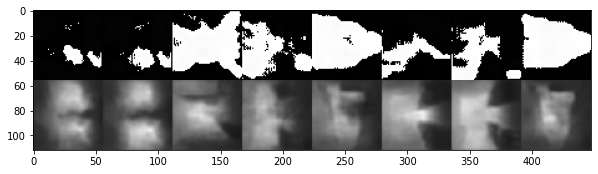

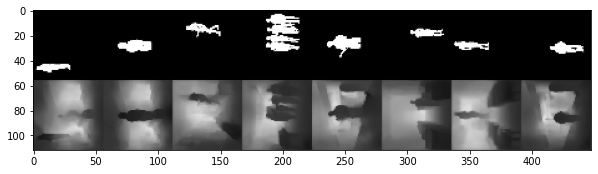

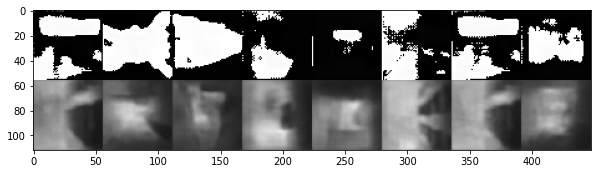

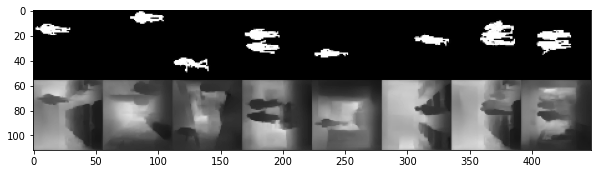

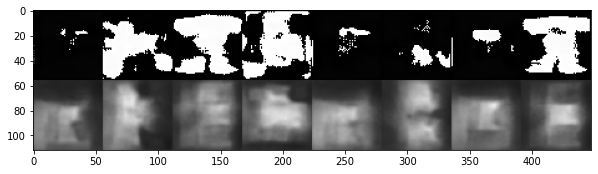

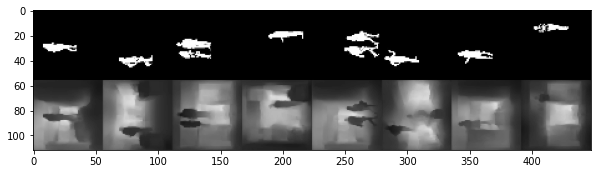

In [56]:
mmdtraintest.display_samples(model_new, test_loader, device)

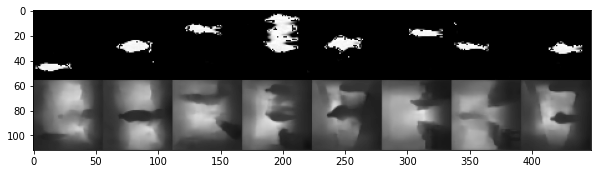

In [0]:
img = iter(test_loader).next()
with torch.no_grad():
    output_val = model_new(img['input'].to(device)).to("cpu")
output_pred = torch.split(output_val,1,dim=1)
# mask_pred = [kornia.tensor_to_image(((output_pred[0][val].to("cpu")*0.0016620444341229432+0.057950844077600344)*255).byte()) for val in range(8) ]
# depth_pred = [kornia.tensor_to_image(((output_pred[1][val].to("cpu")*0.03551773442719045+0.3679109312239146)*255).byte()) for val in range(8) ]

mask_pred = [kornia.tensor_to_image((output_pred[0][val].to("cpu")*255).byte()) for val in range(8) ]
depth_pred = [kornia.tensor_to_image((output_pred[1][val].to("cpu")*255).byte()) for val in range(8) ]


img_shape = img['output'][0][1].shape[1]
mask_gt = [img['output'][0][val].reshape(img_shape,img_shape) for val in range(8) ]
depth_gt = [img['output'][1][val].reshape(img_shape,img_shape) for val in range(8) ]
plt.figure(figsize=(10,10)) 
plt.imshow(np.vstack([np.hstack(mask_pred),np.hstack(depth_pred)]),cmap='gray')

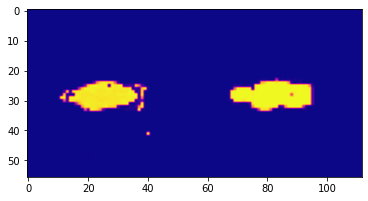

In [0]:
offset=1
plt.imshow(np.hstack([mask_pred[offset],mask_gt[offset]*255]), cmap='plasma')

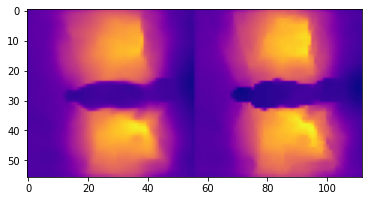

In [0]:
plt.imshow(np.hstack([depth_pred[offset],depth_gt[offset]*255]), cmap='plasma')

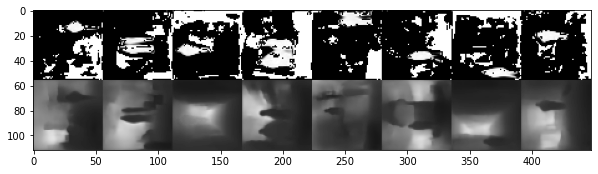

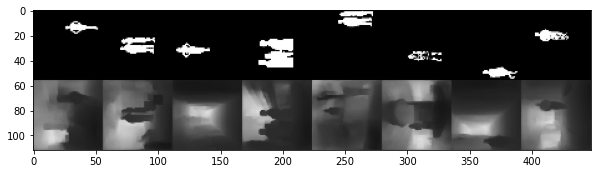

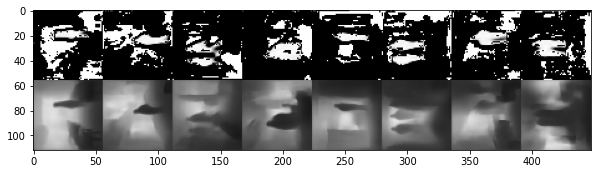

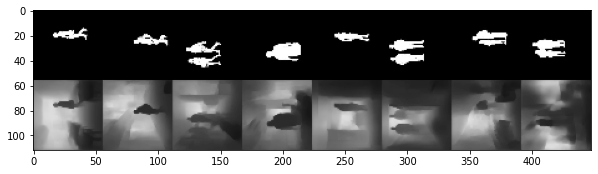

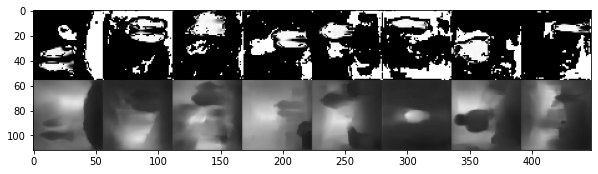

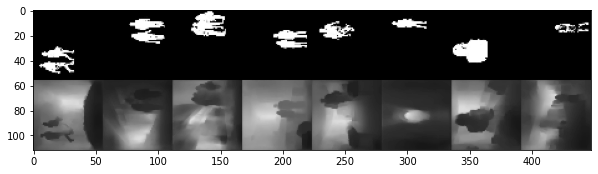

In [0]:
#plt.figure(figsize=(10,10)) 
mmdtraintest.display_samples(model_new, train_loader, device)

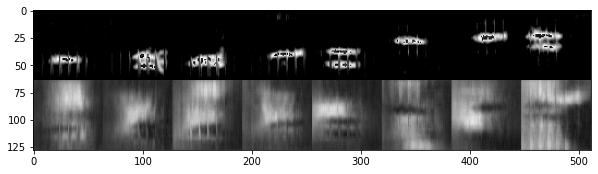

In [0]:
# plt.figure(figsize=(10,10)) 
plt.imshow(np.vstack([np.hstack(mask_pred),np.hstack(depth_pred)]),cmap='gray')

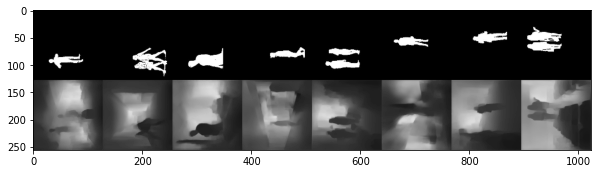

In [0]:
plt.figure(figsize=(10,10)) 
plt.imshow(np.vstack([np.hstack(mask_gt),np.hstack(depth_gt)]),cmap='gray')

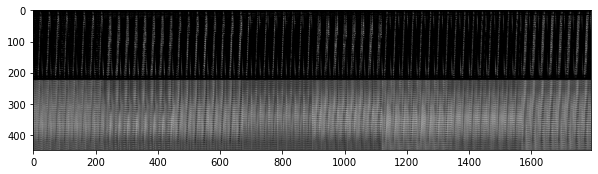

In [0]:
img = iter(train_loader_224).next()
with torch.no_grad():
    output_val = model_new(img['input'].to(device)).to("cpu")

output_pred = torch.split(output_val,1,dim=1)
mask_pred = [kornia.tensor_to_image((output_pred[0][val].to("cpu")*255).byte()) for val in range(8) ]
depth_pred = [kornia.tensor_to_image((output_pred[1][val].to("cpu")*255).byte()) for val in range(8) ]
mask_gt = [img['output'][0][val].reshape(224,224) for val in range(8) ]
depth_gt = [img['output'][1][val].reshape(224,224) for val in range(8) ]
plt.figure(figsize=(10,10)) 
plt.imshow(np.vstack([np.hstack(mask_pred),np.hstack(depth_pred)]),cmap='gray')


### bce_dice_with_rmse_ssim

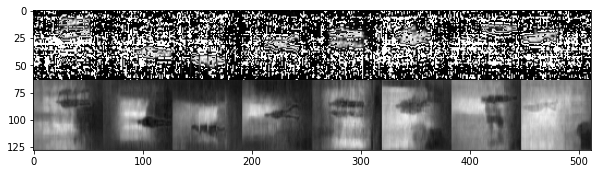

In [0]:
plt.figure(figsize=(10,10)) 
plt.imshow(np.vstack([np.hstack(mask_pred),np.hstack(depth_pred)]),cmap='gray')

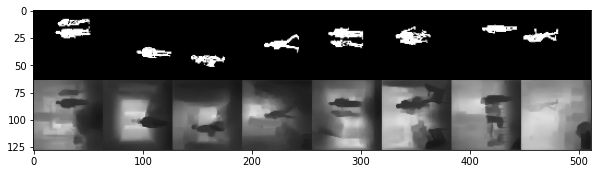

In [0]:
plt.figure(figsize=(10,10)) 
plt.imshow(np.vstack([np.hstack(mask_gt),np.hstack(depth_gt)]),cmap='gray')

In [0]:
plt.imshow(np.hstack([img['output'][1][offset].reshape(64,64),   depth_pred[offset]]),cmap='gray')

## bce_with_rmse

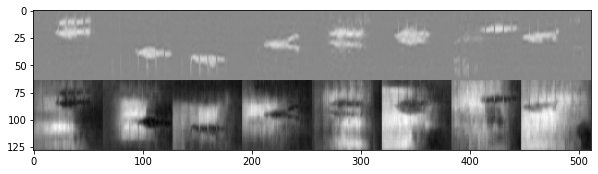

In [0]:
plt.figure(figsize=(10,10)) 
plt.imshow(np.vstack([np.hstack(mask_pred),np.hstack(depth_pred)]),cmap='gray')

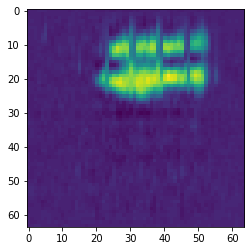

In [0]:
plt.imshow(mask_pred[0])

In [0]:
dice_loss(img['output'][0], output_pred[0])

tensor(0.8533)

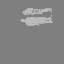

In [0]:
Image.fromarray(kornia.tensor_to_image(((torch.sigmoid(img['output'][0])*255).byte()[0])))

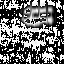

In [0]:
Image.fromarray(kornia.tensor_to_image(((output_pred[0]*255).byte()[0])))

In [0]:
Image.fromarray(kornia.tensor_to_image(((torch.sigmoid(output_pred[0])*255).byte()[0])))

In [0]:
kornia.losses.dice_loss((img['output'][0]*255), (output_pred[0]*255))

In [0]:
output_pred[0].shape

torch.Size([64, 1, 64, 64])

In [0]:
dice_loss(img['output'][0][0], output_pred[0][0])

tensor(0.8170)

In [0]:
def dice_loss(input, target):
    input = torch.sigmoid(input)
    smooth = 1.
    
    iflat = input.view(-1)
    tflat = target.contiguous().view(-1)#reshape(64*64*64)
    #target.view(-1)
    intersection = (iflat * tflat).sum()
    
    return 1 - ((2. * intersection + smooth) /
              (iflat.sum() + tflat.sum() + smooth))

In [0]:
nn.BCEWithLogitsLoss()(img['output'][0], output_pred[0])

tensor(0.6849)

In [0]:
len(mask_pred)

8

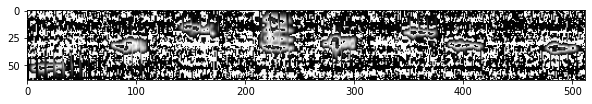

In [0]:
#Image.fromarray(kornia.tensor_to_image((mask_pred*255).byte())),
plt.figure(figsize=(10,10)) 
plt.imshow(np.hstack(mask_pred),cmap='gray')

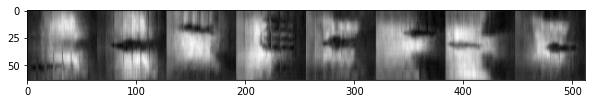

In [0]:
#Image.fromarray(kornia.tensor_to_image((mask_pred*255).byte())),
plt.figure(figsize=(10,10)) 
plt.imshow(np.hstack(depth_pred),cmap='gray')#

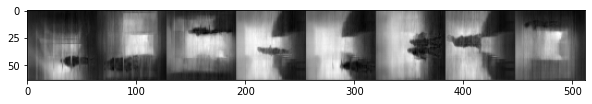

In [0]:


Image.fromarray(kornia.tensor_to_image((mask_pred*255).byte())),
plt.figure(figsize=(10,10)) 
plt.imshow(np.hstack(depth_pred),cmap='gray')#

In [0]:
!pip install kornia

     |████████████████████████████████| 163kB 6.0MB/s 


In [0]:
for zip(img['input'][0],img['input'][1])

In [0]:
np.concatenate((img['input'][0][0].numpy(),img['input'][0][1].numpy()), axis=2).shape

(250, 250, 6)

In [0]:
 
pbar = tqdm(depth_dataset)

#bg_mean = np.zeros((4,3))
n, mean, M2 = (0.0,0.0,0.0)
for i_batch,img in enumerate(pbar):
    #img = depth_dataset[i_batch]
    #img_mean = np.mean(img, axis=(0,1))
    img_mean = np.array([ np.mean(iter_val/255.0,axis=(0,1)) for left_k,right_v in img.items() for iter_val in right_v ])
    n, mean, M2 = update_mean_variance((n, mean, M2), img_mean)

print(finalize_mean_variance(n, mean, M2))

In [0]:
# hf = h5py.File('data7.h5', 'w')
# #base_zip = ZipFile('/content/image_mask_gt2k6k.zip')
# #pbar = tqdm(depth_dataset)
# #hf.close()
# def hf_create_dataset(hdf_file, file_name, data):
#     hdf_file.create_dataset(
#                 name=file_name,
#                 data=data,
#                 compression="gzip", compression_opts=9
#                 )
# i_batch=0
# #for i_batch,img in enumerate(pbar):
# start = time.process_time()
# #try:
# for img in depth_dataset:
#     #key_name = 
#     if(i_batch > 100000):
#         break
#     #val_arr = [iter_val 
#     for left_k,right_v in img.items():
#         for inner_k, iter_val in right_v.items():
#             #print(inner_k)
#             hf_create_dataset(hf, inner_k ,iter_val)

#     if(i_batch % 1000 == 0 and i_batch > 1000):
#         current = time.process_time()
#         print("No:of records processed:{} Time Elapsed:{}".format(i_batch, current-start))
#     i_batch += 1

# end = time.process_time()
# print("No:of records processed:{} Time Elapsed:{}".format(i_batch, end-start))
# #except:

# #    hf.close()

In [0]:
from google.colab import auth
auth.authenticate_user()

In [0]:
from googleapiclient.discovery import build
gcs_service = build('storage', 'v1')

In [0]:
import uuid
bucket_name = 'colab-sample-bucket-' + str(uuid.uuid1())

body = {
  'name': bucket_name,
  # For a full list of locations, see:
  # https://cloud.google.com/storage/docs/bucket-locations
  'location': 'us',
}
gcs_service.buckets().insert(project=project_id, body=body).execute()
print('Done')

In [0]:
hf.close()

In [0]:
hf_read = h5py.File('data7.h5', 'r')

In [0]:
hf_read.keys()

<KeysViewHDF5 ['depth_image_023aa22186_classroom_1.jpg', 'depth_image_0ccf0b6adb_classroom_8.jpg', 'depth_image_0d06379c4e_classroom_12.jpg', 'depth_image_100078863e_classroom_10.jpg', 'depth_image_1000d68e48_classroom_2.jpg', 'depth_image_10023ed777_classroom_12.jpg', 'depth_image_10027aa3fa_classroom_4.jpg', 'depth_image_1002953763_classroom_1.jpg', 'depth_image_1002a448f4_classroom_10.jpg', 'depth_image_1002be3508_classroom_3.jpg', 'depth_image_1002e52563_classroom_14.jpg', 'depth_image_1002e75f62_classroom_15.jpg', 'depth_image_100317e99d_classroom_14.jpg', 'depth_image_1003212d72_classroom_8.jpg', 'depth_image_10033c4a69_classroom_8.jpg', 'depth_image_10038181d7_classroom_3.jpg', 'depth_image_1003ffcca2_classroom_10.jpg', 'depth_image_1004993b2d_classroom_13.jpg', 'depth_image_1004dd5dd3_classroom_16.jpg', 'depth_image_100659c8dd_classroom_17.jpg', 'depth_image_1006609a43_classroom_16.jpg', 'depth_image_10074a3520_classroom_8.jpg', 'depth_image_1007f75489_classroom_8.jpg', 'depth_

In [0]:
### Knuth/Welford algorithm to generate mean by addition of new samples to existing mean

def update_mean_variance(existingAggregate, newValue):
    (count, mean, M2) = existingAggregate
    count += 1
    delta = newValue - mean
    mean += delta / count
    delta2 = newValue - mean
    M2 += delta * delta2

    return (count, mean, M2)

# Retrieve the mean, variance and sample variance from an aggregate
def finalize_mean_variance(existingAggregate):
    (count, mean, M2) = existingAggregate
    if count < 2:
        return float('nan')
    else:
       (mean, variance, sampleVariance) = (mean, M2 / count, M2 / (count - 1))
       return (mean, variance, sampleVariance)

In [0]:
calc_mean,variance, _ = finalize_mean_variance((n, mean, M2))
print(calc_mean)
print(np.sqrt(variance))

[[0.56632738 0.51567622 0.45670792]
 [0.57469445 0.52241555 0.45992244]
 [0.05795104 0.05795104 0.05795104]
 [0.61635181 0.21432114 0.50569604]]
[[0.1076622  0.10650349 0.12808967]
 [0.11322354 0.11195428 0.13441683]
 [0.02640032 0.02640032 0.02640032]
 [0.09193359 0.07619106 0.04919082]]


In [0]:
#depth_map = np.hstack([depth_dataset[index_val]['output'][1] for index_val in myrandom_array])
depth_map = [depth_dataset[index_val]['output'][1] for index_val in myrandom_array]
mask_image = [depth_dataset[index_val]['output'][0] for index_val in myrandom_array]
bg_image = [depth_dataset[index_val]['input'][1] for index_val in myrandom_array]
fg_bg_image = [depth_dataset[index_val]['input'][0] for index_val in myrandom_array]
final_list = np.hstack([ mask_image, bg_image, fg_bg_image])

In [0]:
from matplotlib import pyplot as plt

In [0]:
plt.figure(figsize=(24,32))
plt.imshow(depth_map,cmap='gray')

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

fig = plt.figure(figsize=(100., 100.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 20),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
for ax, im in zip(grid, depth_map):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()

In [0]:
plt.savefig('/content/drive/My Drive/EVA4/tsai/S15EVA4/depthmaptile.png')

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

fig = plt.figure(figsize=(100., 100.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 20),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
for ax, im in zip(grid, final_list):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()

In [0]:
Image.fromarray(depth_dataset[0]['output'][0])

In [0]:
Image.fromarray(depth_dataset[0]['output'][1])

In [0]:
import glob
fileList = [file_name for file_name in glob.glob('/content/drive/My Drive/EVA4/tsai/S15EVA4/people_cropresize/*png')]
print("Number of images of people:{}".format(len(fileList)))

Number of images of people:110


In [0]:
import os

for file_name in fileList:
    image_name = os.path.basename(file_name)
    my_array = np.array(Image.open(file_name))
    print("FileName: {} Shape:{}".format(image_name, my_array.shape))

In [0]:
base_dir = '/content/drive/My Drive/EVA4/tsai/S15EVA4/people_cropresize/'
aug_path = '/content/drive/My Drive/EVA4/tsai/S15EVA4/people_cropresize/aug_images'
image_list = [ ]


for file_name in glob.glob(base_dir+"/*png")[:20]:
    basefile_name = os.path.basename(file_name)
    #print(basefile_name)
    mask_name = os.path.join(aug_path,"mask_"+basefile_name)
    flip_name = os.path.join(aug_path,"flip_"+basefile_name)
    flip_mask_name = os.path.join(aug_path,"mask_"+os.path.basename(flip_name))
    print(file_name,mask_name,flip_name,  flip_mask_name)
    image_list.append([np.array(Image.open(val)) for val in [file_name,mask_name,flip_name,  flip_mask_name ]])

In [0]:
for val in image_list:
    plt.imshow(np.hstack([val[0],val[2]]))
    plt.imshow(np.hstack([val[1],val[3]]))

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
#for iter in image_list:
for ax, im in zip(grid, image_list[2]):
    #print(ax., )
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap='gray')

In [0]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [0]:
model = ResNet50(weights='imagenet')

102973440/102967424 [==============================] - 1s 0us/step


In [0]:
model.summary()